In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv
import plumed

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


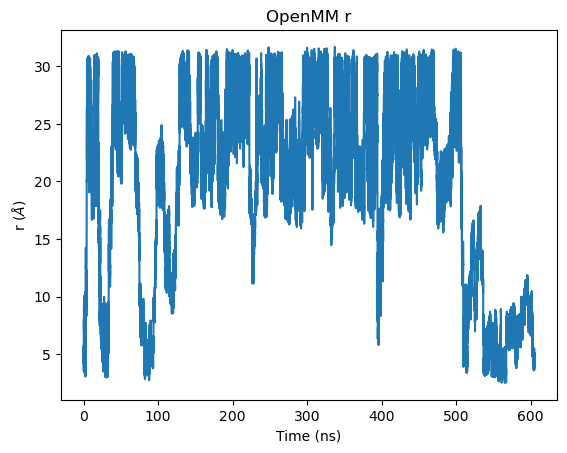

In [2]:
colvars = plumed.read_as_pandas('../007_r/COLVAR')
cv = colvars['r'] * 10
time = colvars['time']
plt.plot(time/1000 - 10, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'r (${\AA}$)')
plt.title('OpenMM r')
plt.savefig('figures/r_OpenMM_r.png')


In [5]:
print(cv[-10:])

56118    3.942
56119    3.776
56120    3.560
56121    3.496
56122    3.679
56123    3.709
56124    3.704
56125    3.928
56126    3.475
56127    2.903
Name: r, dtype: float64


In [2]:
colvars = plumed.read_as_pandas('../005_PolarTheta/COLVAR')
colvars.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


Index(['time', 'rmsd', 'q.w', 'q.x', 'q.y', 'q.z', 'eulerTheta', 'eulerPhi',
       'eulerPsi', 'i.x', 'i.y', 'i.z', 'polarTheta', 'meta.bias',
       'lwall-polarTheta.bias', 'lwall-polarTheta.force2',
       'uwall-polarTheta.bias', 'uwall-polarTheta.force2', 'rmsd_res.bias',
       'rmsd_res.force2', 'eulerTheta_res.bias', 'eulerTheta_res.force2',
       'eulerPhi_res.bias', 'eulerPhi_res.force2', 'eulerPsi_res.bias',
       'eulerPsi_res.force2', 'translation', 'translation_res.bias',
       'translation_res.force2', 'rot_q.w', 'rot_q.x', 'rot_q.y', 'rot_q.z',
       'orientation.bias', 'orientation.force2'],
      dtype='object')

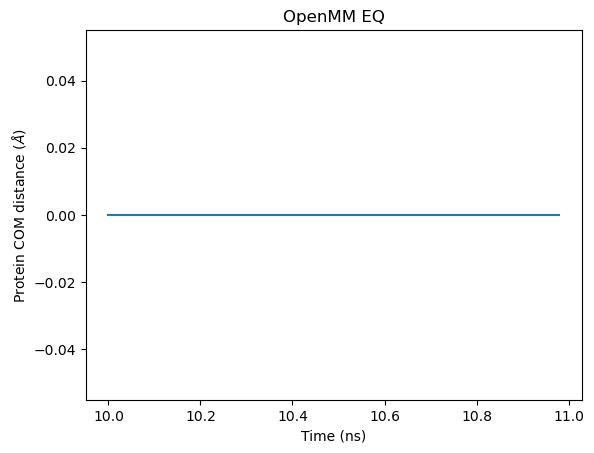

In [7]:
cv = colvars['uwall-polarTheta.bias']
time = colvars['time']
plt.plot(time/1000, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein COM distance (${\AA}$)')
plt.title('OpenMM EQ')
plt.savefig('figures/eq_d1.png')

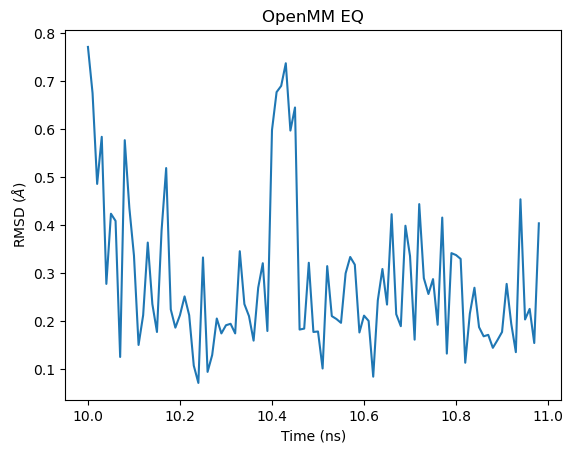

In [4]:
cv = colvars['rmsd']
time = colvars['time']
plt.plot(time/1000, cv*10)
plt.xlabel('Time (ns)')
plt.ylabel(r'RMSD (${\AA}$)')
plt.title('OpenMM EQ')
plt.savefig('figures/eq_rmsd.png')

In [5]:
# colvars = plumed.read_as_pandas('../000_eq/COLVAR_')
# eulertheta = colvars['eulerTheta']
# bins, edges = np.histogram(eulertheta, bins=100, density=True)
# plt.plot(edges[:-1], bins)
# print(edges[np.argmax(bins)], bins[np.argmax(bins)])

In [6]:
hist = plumed.read_as_pandas('../000_eq/histo')
eulertheta = hist['eulerTheta']
counts = hist['hh']
plt.plot(eulertheta, counts)
print(eulertheta[np.argmax(counts)], counts[np.argmax(counts)])
w = 20
print(f"range = {eulertheta[np.argmax(counts)] -20} ,{eulertheta[np.argmax(counts)]+20} ")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


FileNotFoundError: [Errno 2] No such file or directory: '../000_eq/histo'

In [2]:
colvars = plumed.read_as_pandas('../002_EulerTheta/COLVAR')
colvars.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/nz/projects/BFEE2/packages/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


Index(['time', 'rmsd', 'q.w', 'q.x', 'q.y', 'q.z', 'eulerTheta', 'meta.bias',
       'lwall-eulerTheta.bias', 'lwall-eulerTheta.force2',
       'uwall-eulerTheta.bias', 'uwall-eulerTheta.force2', 'rmsd_res.bias',
       'rmsd_res.force2', 'd1', 'translation.bias', 'translation.force2',
       'rot_q.w', 'rot_q.x', 'rot_q.y', 'rot_q.z', 'orientation.bias',
       'orientation.force2'],
      dtype='object')

-32.9362 -11.4339


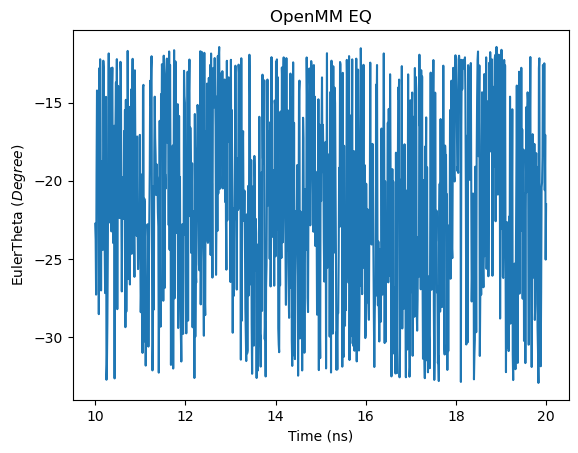

In [5]:
cv = colvars['eulerTheta']
time = colvars['time']
plt.plot(time/1000, cv,)
plt.xlabel('Time (ns)')
plt.ylabel(r'EulerTheta (${Degree}$)')
plt.title('OpenMM EQ')
plt.savefig('figures/eulertheta_eulertheta.png')
print(min(cv), max(cv))

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


46.8732 87.0897
57.4952 75.1786


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


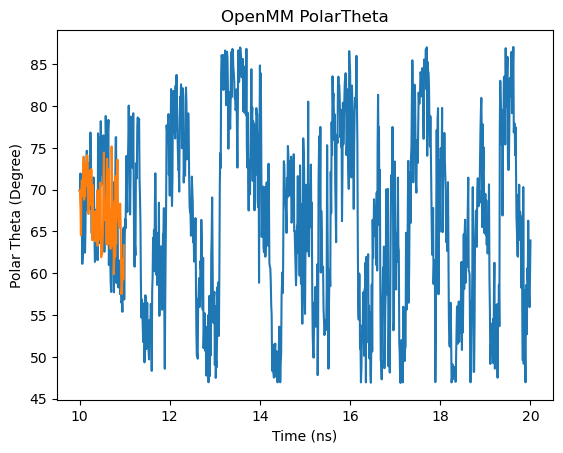

In [8]:
colvars1 = plumed.read_as_pandas('../005_PolarTheta_main/COLVAR')
cv = colvars1['polarTheta'][::100]
time = colvars1['time'][::100]

plt.plot(time/1000, cv)
print(min(cv), max(cv))
colvars2 = plumed.read_as_pandas('../005_PolarTheta/COLVAR')
cv = colvars2['polarTheta']
time = colvars2['time']
plt.plot(time/1000, cv)

plt.xlabel('Time (ns)')
plt.ylabel(r'Polar Theta (Degree)')
plt.title('OpenMM PolarTheta')
#plt.savefig('figures/eq_d1.png')
#print("58.797, 77.4564")
print(min(cv), max(cv))
plt.savefig('figures/polartheta_polartheta_openmm.png')


In [2]:
def parseDat(filename):
    """Parse a dat (histogram) file and return the most probable CV value

    Args:
        filename (str): the dat file to be parsed with
        
    Returns:
        float: the most probable CV value
    """
    
    data = np.loadtxt(filename)
    CVs = data[:,0]
    counts = data[:,1]
    
    maxCV = -1
    maxCount = -1
    for i, j in zip(CVs, counts):
        if j > maxCount:
            maxCV = i
            maxCount = j
    return data, maxCV

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++
/tmp/ipykernel_97323/1528759911.py:9: RuntimeWarning: divide by zero encountered in log
  free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++
/home/ndonyapour/miniconda3/envs/bfee2/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_97323/1528759911.py:26: RuntimeWarning: divide by zero encountered in log
  free_energy_namdhist = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(data[:, 1])) / 4.184


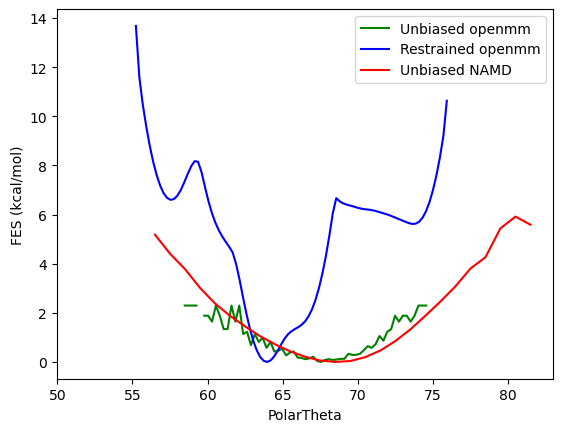

In [15]:
colvars = plumed.read_as_pandas('../000_eq/COLVAR')
cv = colvars['polarTheta']
bins, edges = np.histogram(cv, bins=100, density=True)

# dG = -RT ln P, R is the gas constant 
TEMPERATURE = 300 #* unit.kelvin
GAS_CONSTANT = 8.314e-3  #kJ/(mol·K)
# unbiased openmm
free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
min_fes = min(free_energy_op_unbiased)
plt.plot(edges[:-1], free_energy_op_unbiased - min_fes, 'g', label="Unbiased openmm")

#biased OpenMM
hist = plumed.read_as_pandas('../polar_test/histoB')
hist.columns
cv = hist["polarTheta"]
prob = hist['hB'] 
free_energy_ophist = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(prob)) / 4.184
min_fes = min(free_energy_ophist)
plt.plot(cv, free_energy_ophist - min_fes, 'b', label="Restrained openmm")

# inbiased NAMD
hist_file = f'../../../NAMD_bfee2_2wi3/BFEE_NAMD/000_eq/output/eq.histogram5.dat'
data, center = parseDat(hist_file)

free_energy_namdhist = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(data[:, 1])) / 4.184
min_fes = min(free_energy_namdhist)
plt.plot(data[:, 0], free_energy_namdhist - min_fes, 'r', label="Unbiased NAMD")

plt.xlabel("PolarTheta")
plt.ylabel("FES (kcal/mol)")
plt.legend()
plt.savefig("figures/compare_polartheta_fes.png")


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv
import plumed

/tmp/ipykernel_14371/1097803140.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvars = plumed.read_as_pandas('../007_r/COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


29.270999999999997


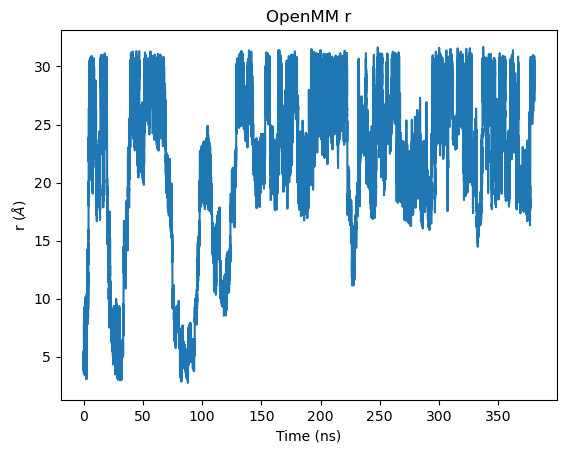

In [13]:
colvars = plumed.read_as_pandas('../007_r/COLVAR')
cv = colvars['r'] * 10
time = colvars['time']
plt.plot(time/1000 - 10, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'r (${\AA}$)')
plt.title('OpenMM r')
plt.savefig('figures/r_OpenMM_r.png')
print(np.array(cv)[-1])

In [3]:
import pickle

In [8]:
with open("colvars.pkl", "wb") as wfile:
    pickle.dump(colvars, wfile)

AttributeError: Can't pickle local object 'read_as_pandas.<locals>.PlumedDataFrame'

In [9]:
colvars.to_csv("colvars") 

In [11]:
plumed.write_pandas(colvars, "../007_r/COLVAR")